In [ ]:
pip install seaborn

Coding a Predict model to predict Iris plants into three species

In [19]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
# Importing train dataset and taking a first look at it

dataset = pd.read_csv('iris.csv')

dataset.info() # There is no column with na values

In [11]:
# Taking a look at the first lines of the dataset
# According to Kaggle, the column species is the one that we gonna use to train our predict model
print(dataset.head())
dataset.groupby(['species']).count()

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


In [12]:
# Removing columns that will not be used for model training, those will be stored as X and y, y beeing the target values
X = dataset.drop(['species'], axis=1).values
y = dataset['species'].values

# Separating dataset into train and test variables. Since it is a small amount of data, we will consider 30% as test size.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Creating an instance of the predicting model. We will do a comparission of three models: KNeighborsClassifier and DecisionTreeClassifier. It will be compared using the Accuracy Score and the Confusion Matrix Method

KNeighborsClassifier:

In [13]:
# Getting the best number of neighbors:
from sklearn.model_selection import cross_val_score

k_values = range(1, 21)  # Testar n_neighbors de 1 a 20

# List to store results
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Cross validation with 5 divisions
    score = cross_val_score(knn, X, y, cv=5, scoring='accuracy').mean()
    scores.append(score)

# Find the k value with best performance
best_k = k_values[np.argmax(scores)]
print(f"Best value for n_neighbors: {best_k}") # 6

Best value for n_neighbors: 6


In [14]:
# Creating instance of KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)

# Fitting out model using the train variables
knn.fit(X_train, y_train)

# Predicting our data from the test variables
knn_prediction = knn.predict(X_test)

DecisionTreeClassifier:

In [20]:
# Creating instance of KNeighborsClassifier
tree = DecisionTreeClassifier()

# Fitting out model using the train variables
tree.fit(X_train, y_train)

# Predicting our data from the test variables
tree_prediction = tree.predict(X_test)

Which one was the best model?

Accuracy test

In [21]:
# What was the Accuracy?
knn_accuracy = accuracy_score(y_test, knn_prediction)
tree_accuracy = accuracy_score(y_test, tree_prediction)
print(f'Accuracy for KNeighbors: {format(np.round(knn_accuracy * 100, 2))}%')
print(f'Accuracy for DecisionTree: {format(np.round(tree_accuracy * 100, 2))}%')

Accuracy for KNeighbors: 93.33%
Accuracy for DecisionTree: 95.56%


Confusion Matrix test

In [27]:
# Evaluating KNeighbors using confusion matrix
knn_cf_matrix = confusion_matrix(y_test, knn_prediction)

# Evaluating DecisionTree using confusion matrix
tree_cf_matrix = confusion_matrix(y_test, tree_prediction)

print('Accuracy for KNeighbors:')
print(knn_cf_matrix)
print('Accuracy for DecisionTree:')
print(tree_cf_matrix)

Accuracy for KNeighbors:
[[13  0  0]
 [ 0 13  1]
 [ 0  2 16]]
Accuracy for DecisionTree:
[[13  0  0]
 [ 0 13  1]
 [ 0  1 17]]


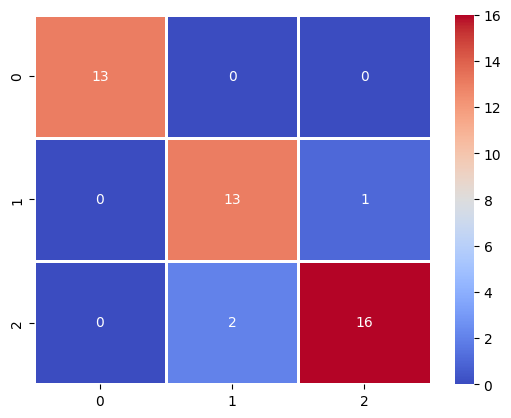

In [31]:
# Heatmap of confusion matrix
knn_heatmap = sns.heatmap(knn_cf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')

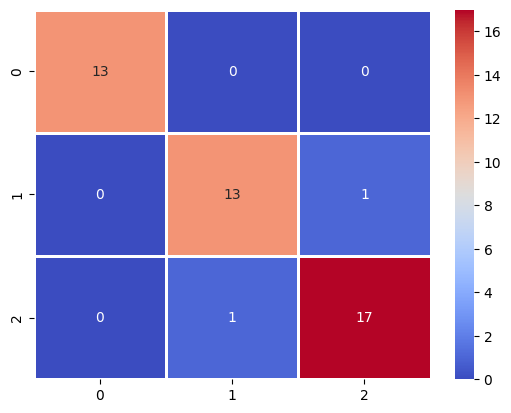

In [30]:
# Heatmap of confusion matrix
tree_heatmap = sns.heatmap(tree_cf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')

We can see that RandomForest was the best model for this dataset.
Now lets use the trained model in the test dataset to see whether each passanger will survive.

Since Kaggle didn't give us a test dataset, lets create one!

In [32]:
# Getting max and min of each column
sepal_length_max = np.max(dataset['sepal_length'])
sepal_length_min = np.min(dataset['sepal_length'])

sepal_width_max = np.max(dataset['sepal_width'])
sepal_width_min = np.min(dataset['sepal_width'])

petal_length_max = np.max(dataset['petal_length'])
petal_length_min = np.min(dataset['petal_length'])

petal_width_max = np.max(dataset['petal_width'])
petal_width_min = np.min(dataset['petal_width'])

In [33]:
# Generating random arrays of each column to use as a test dataframe
new_sepal_length = np.random.uniform(low=sepal_length_min, high=sepal_length_max, size=len(dataset))
new_sepal_width = np.random.uniform(low=sepal_width_min, high=sepal_width_max, size=len(dataset))
new_petal_length = np.random.uniform(low=petal_length_min, high=petal_length_max, size=len(dataset))
new_petal_width = np.random.uniform(low=petal_width_min, high=petal_width_max, size=len(dataset))

In [34]:
# Creating a new DataFrame
iris_test = pd.DataFrame()

# Adding columns to it
iris_test['sepal_length'] = new_sepal_length
iris_test['sepal_width'] = new_sepal_width
iris_test['petal_length'] = new_petal_length
iris_test['petal_width'] = new_petal_width

In [ ]:
# Predicting with KNeighbors previously trained
predict = tree.predict(iris_test)

In [36]:
# Add the prediction column into the test dataset
iris_test['prediction'] = predict
iris_test

,sepal_length,sepal_width,petal_length,petal_width,prediction
0,4.340296,3.570070,5.659001,1.963580,virginica
1,5.109276,4.313196,5.115787,0.512078,setosa
2,7.630488,2.728970,2.529299,1.114750,versicolor
3,6.221495,3.973853,4.612378,2.350881,versicolor
4,7.622495,3.529395,1.173290,0.844994,versicolor
...,...,...,...,...,...
145,5.628010,3.631210,4.502686,0.528879,setosa
146,5.404175,2.611873,2.864543,0.432147,setosa
147,5.155374,2.368718,3.360374,2.119388,virginica
148,5.865380,2.487985,5.665517,0.406497,setosa
